In [30]:
import pdf2image
import numpy as np
import layoutparser as lp
import torchvision.ops.boxes as bops
import torch
import warnings
warnings.filterwarnings('ignore')

In [2]:
def set_coordinate(data):

  x1 = data.block.x_1
  y1 = data.block.y_1
  x2 = data.block.x_2
  y2 = data.block.y_2

  return torch.tensor([[x1, y1, x2, y2]], dtype=torch.float)


def check_intersection(block_1, block_2):
    
    bb1 = set_coordinate(block_1)
    bb2 = set_coordinate(block_2)

    iou = bops.box_iou(bb1, bb2)

    if iou.tolist()[0][0] != 0:
        return True
    
    else :
        return False
    
    
def union(layout_result):
    
    for layout_i in layout_result:
        for layout_j in layout_result:
            if layout_i == layout_j == layout_result[-1]:
                return layout_result
            if layout_i != layout_j:
                if check_intersection(layout_i, layout_j) == True:
                    layout_result.insert(layout_result.index(layout_i),layout_i.union(layout_j,strict=False))
                    layout_result.remove(layout_i)
                    layout_result.remove(layout_j)
                    return union(layout_result)    

In [3]:
pdf_file = '/home/socrates/2022_PFE/cv4.pdf'
img = np.asarray(pdf2image.convert_from_path(pdf_file)[0])

In [4]:
model1 = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.3],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout_result1 = model1.detect(img)

In [5]:
model2 = lp.Detectron2LayoutModel('lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.1],
                                 label_map={1:"TextRegion", 2:"ImageRegion", 3:"TableRegion", 4:"MathsRegion", 5:"SeparatorRegion", 6:"OtherRegion"})
layout_result2 = model2.detect(img)

In [6]:
layout_result1 = lp.Layout([b for b in layout_result1 if b.type in ('Text','Title')])
layout_result2 = lp.Layout([b for b in layout_result2 if b.type == 'TextRegion'])

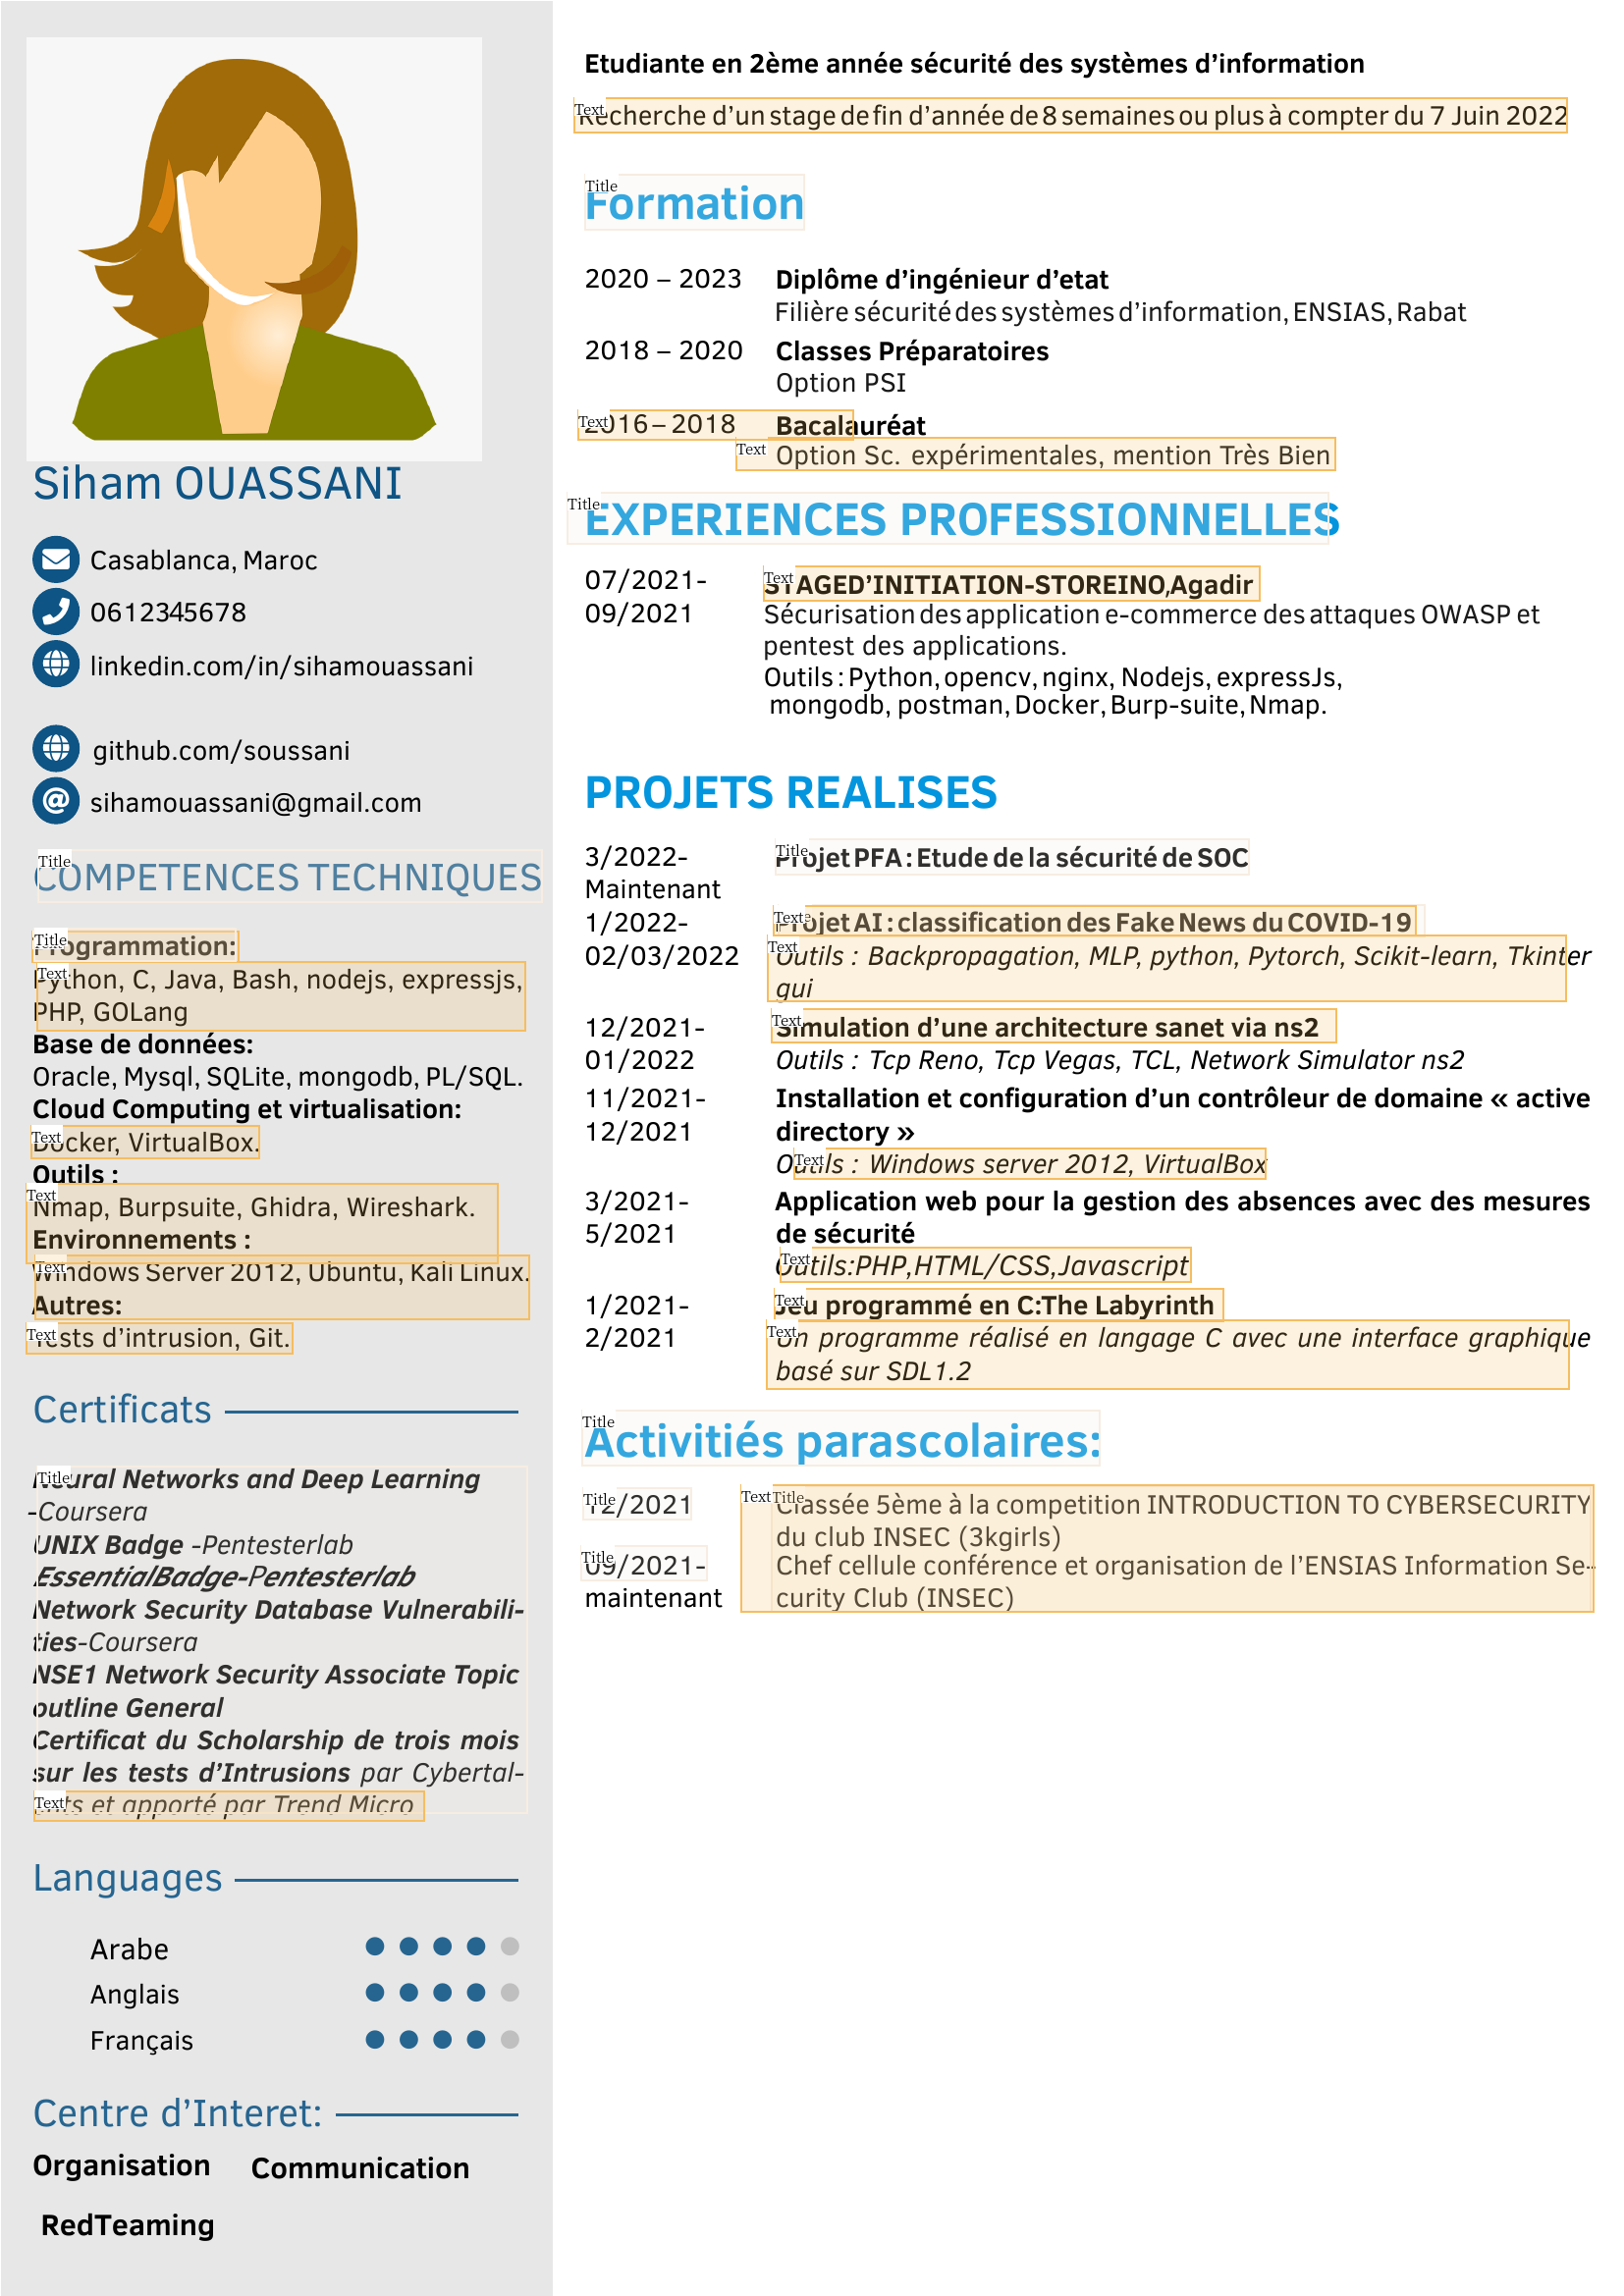

In [7]:
lp.draw_box(img, layout_result1,  box_width=2, box_alpha=0.2, show_element_type=True)

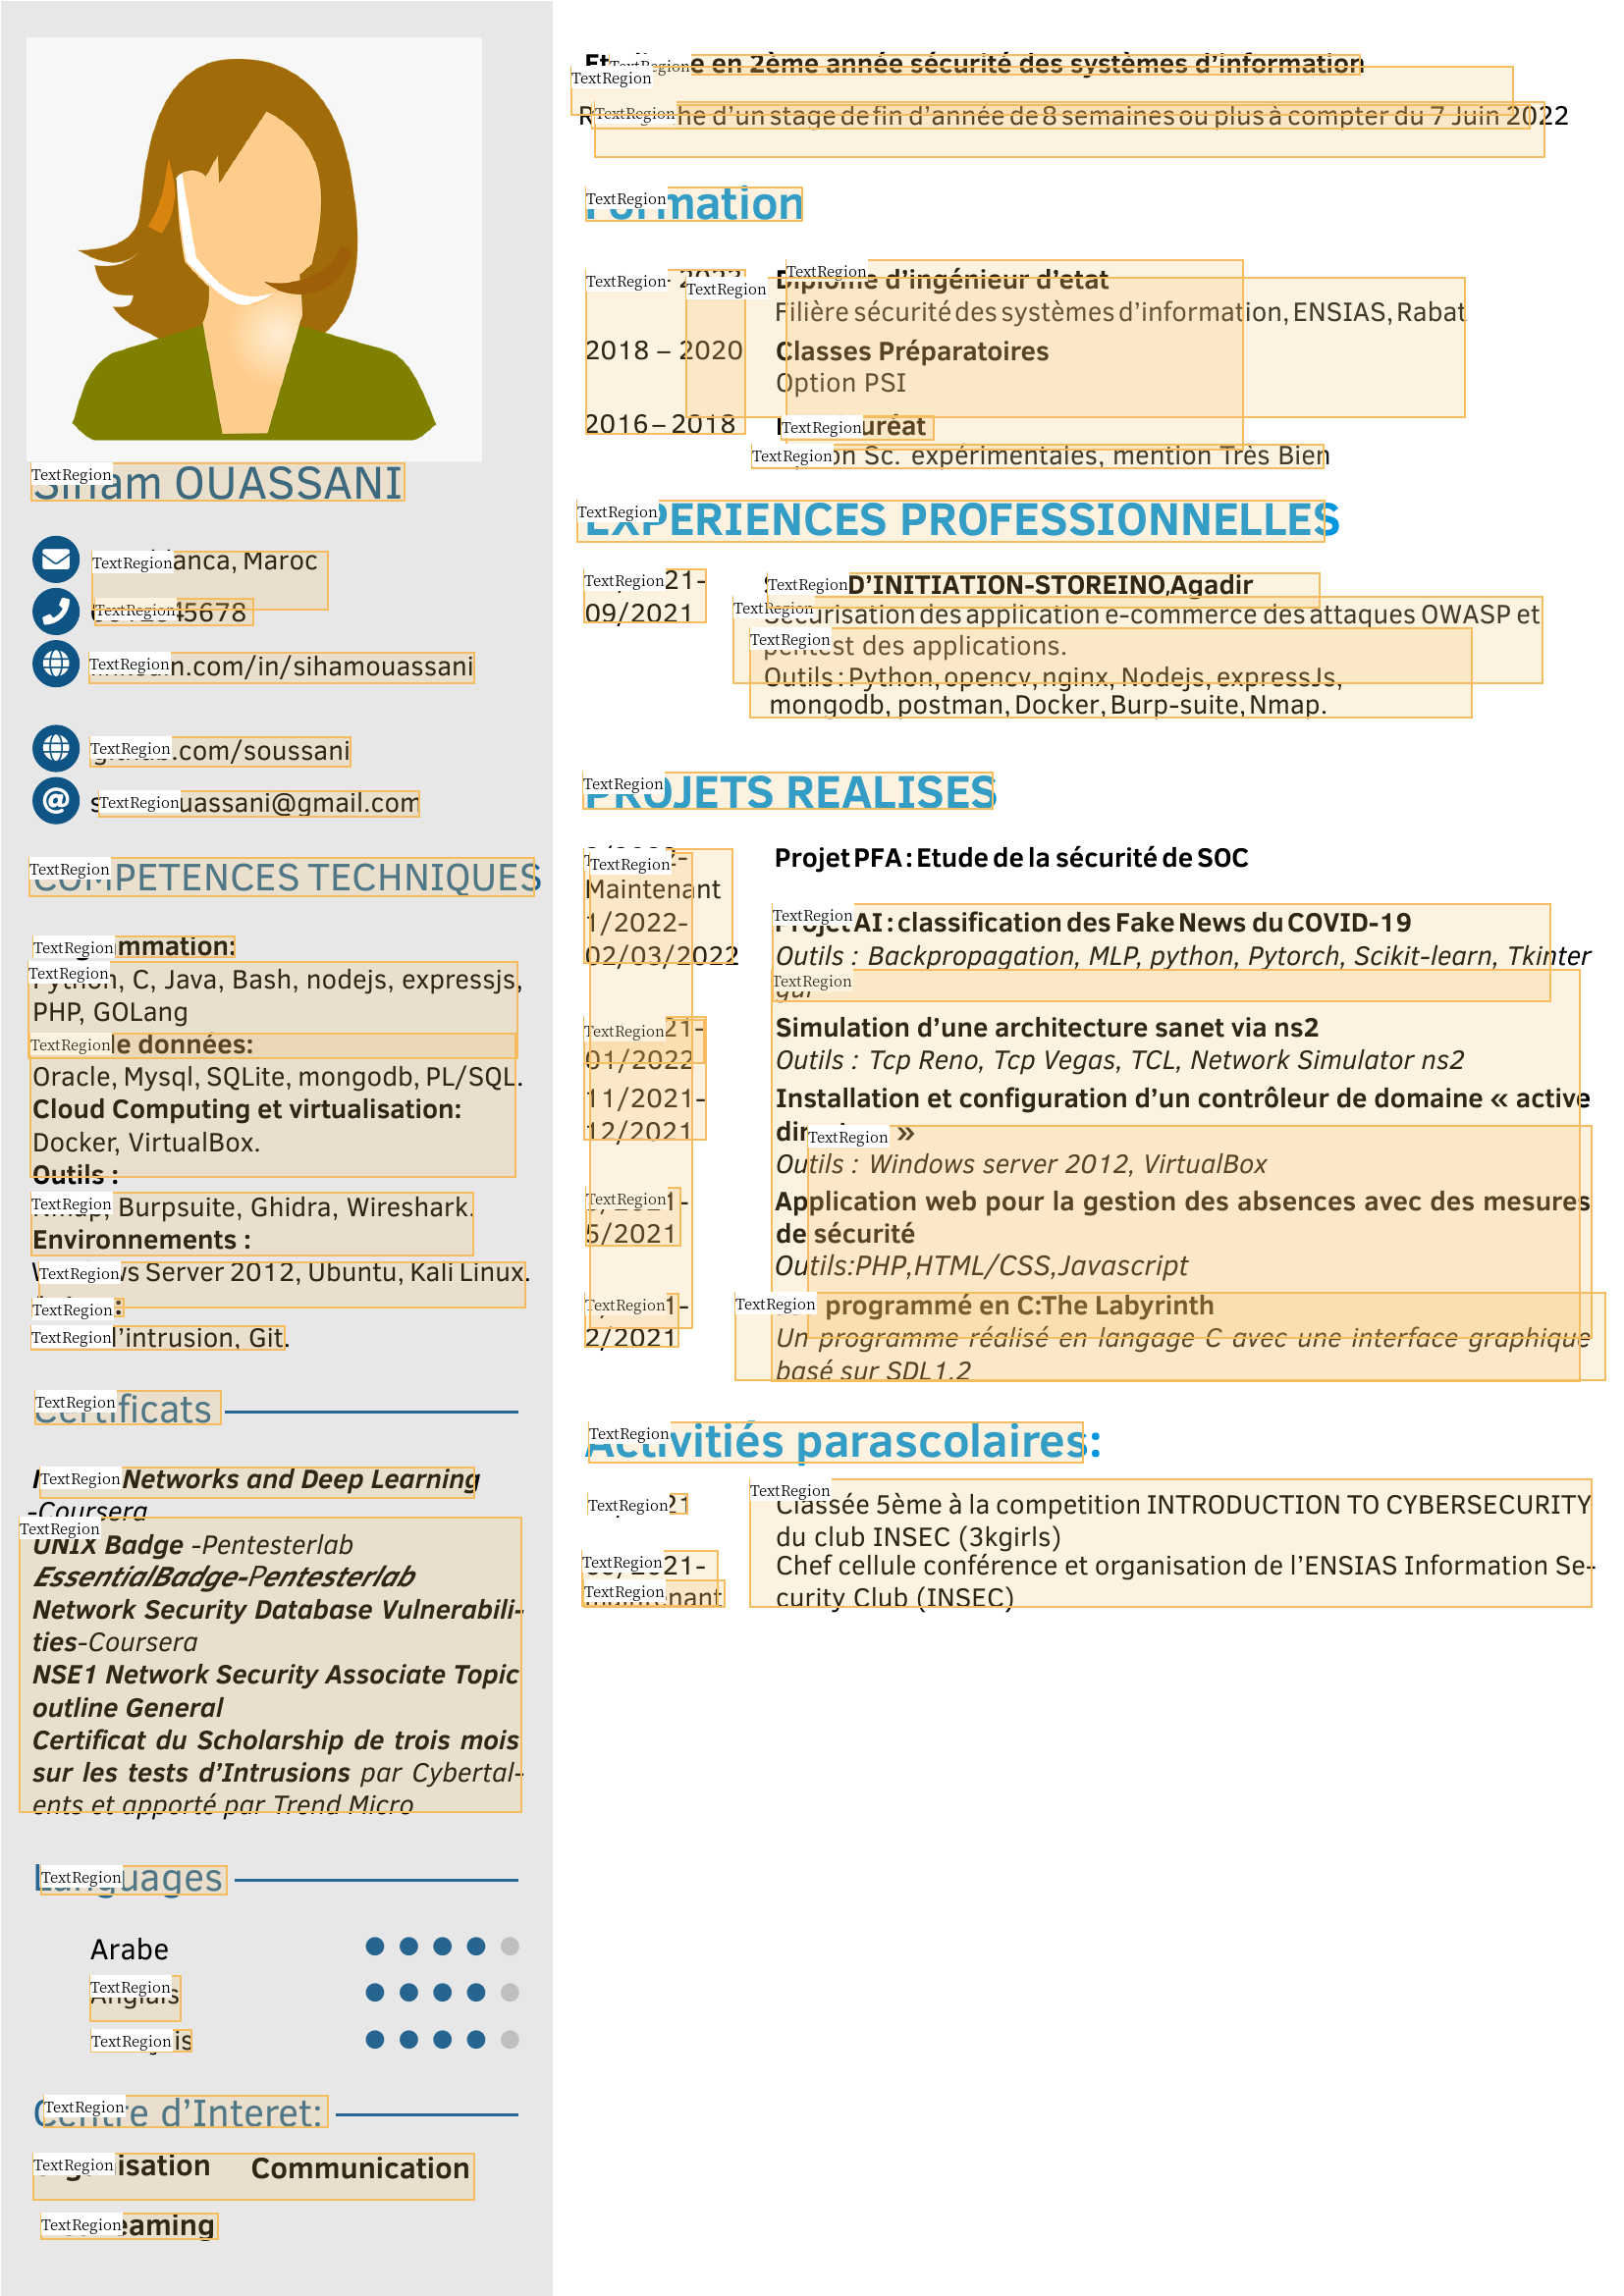

In [8]:
lp.draw_box(img, layout_result2,  box_width=2, box_alpha=0.2, show_element_type=True)

In [9]:
layout_result = layout_result1 + layout_result2

In [10]:
layout_result = union(layout_result)  

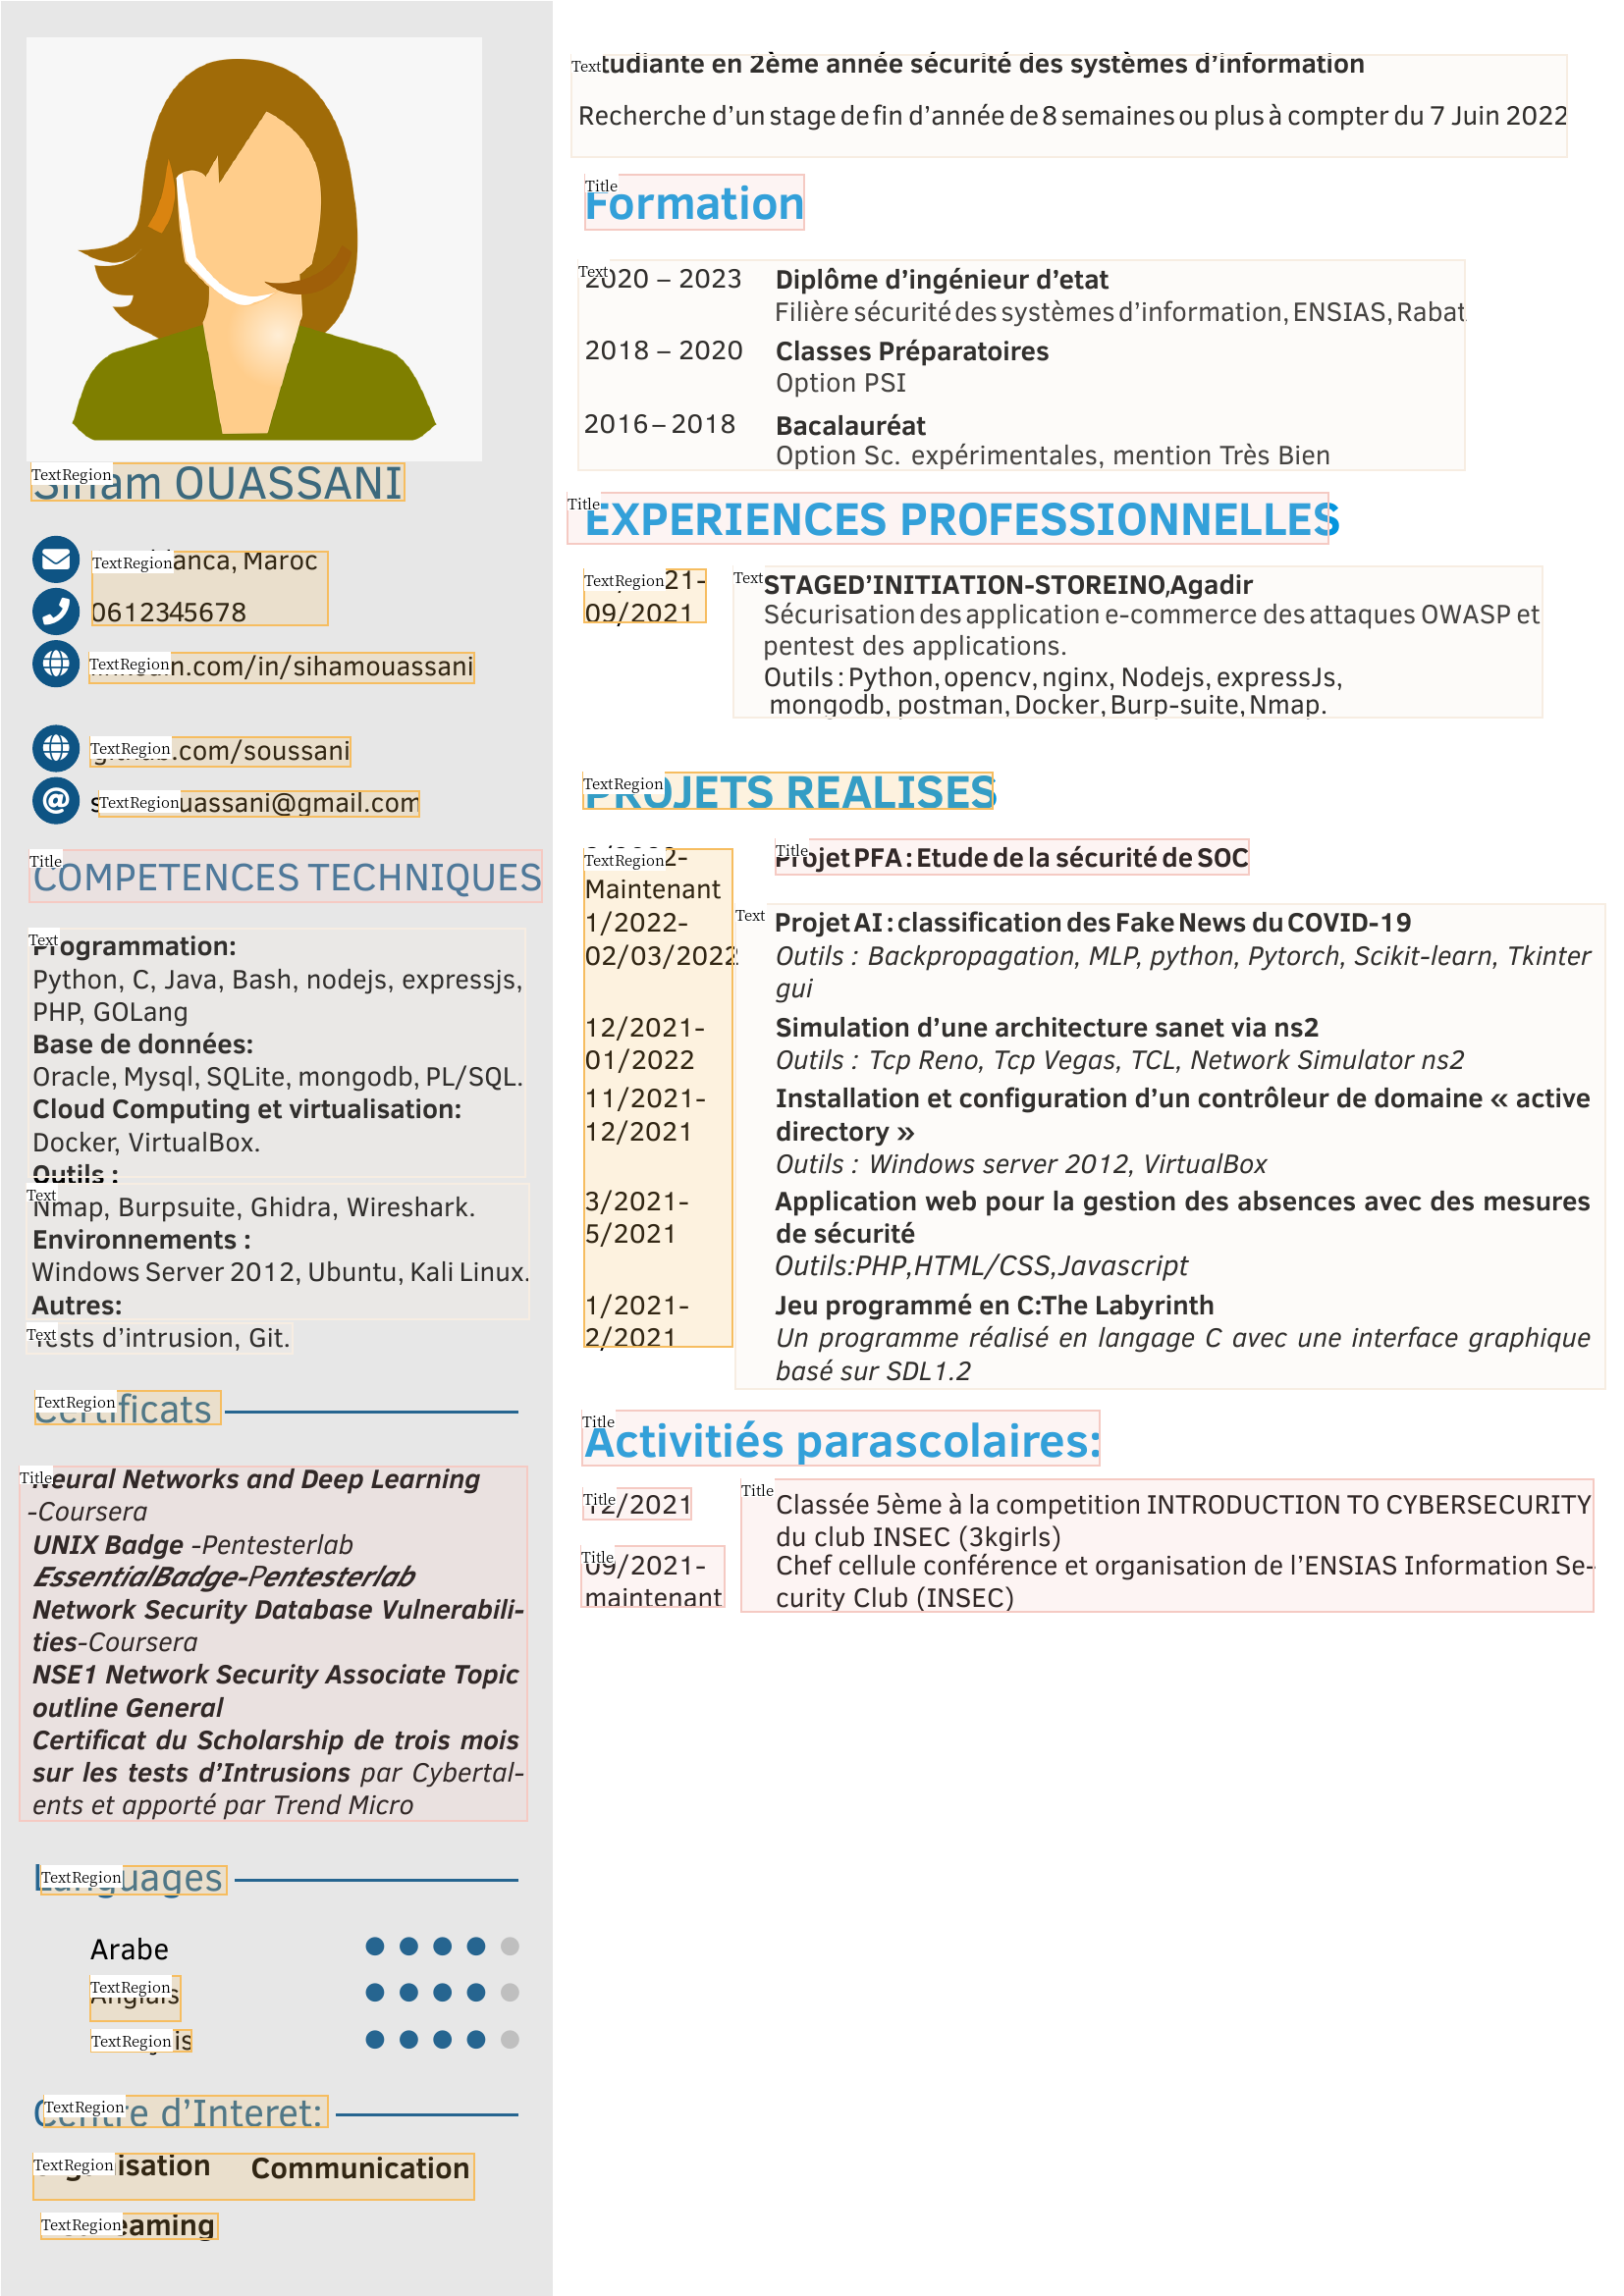

In [11]:
lp.draw_box(img, layout_result,  box_width=2, box_alpha=0.2, show_element_type=True)

In [12]:
text_blocks = lp.Layout([b for b in layout_result])

In [13]:
image_width = len(img[0])

# Sort element ID of the left column based on y1 coordinate
left_interval = lp.Interval(0, image_width/4, axis='x').put_on_canvas(img)
left_blocks = text_blocks.filter_by(left_interval, center=True)._blocks
left_blocks.sort(key = lambda b:b.coordinates[1])

# Sort element ID of the right column based on y1 coordinate
right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# Sort the overall element ID starts from left column
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

In [14]:
ocr_agent = lp.TesseractAgent()

In [84]:
for block in text_blocks:

    # Crop image around the detected layout
    segment_image = (block
                       .pad(left=15, right=15, top=5, bottom=5)
                       .crop_image(img))
    
    # Perform OCR
    text = ocr_agent.detect(segment_image)

    # Save OCR result
    block.set(text=text, inplace=True)

In [203]:
cv = []
for b in text_blocks:
    cv.append(b.text)
    print(b.text)

Siham OUASSANI

) Casablanca, Maroc

} 0612345678

) linkedin.com/in/sihamouassani

) github.com/soussani

sihamouassani@gmail.com

COMPETENCES TECHNIQUES

Programmation:

Python, C, Java, Bash, nodejs, expressjs,
PHP, GOLang

Base de données:

Oracle, Mysql, SQLite, mongodb, PL/SQL.
Cloud Computing et virtualisation:
Docker, VirtualBox.

Outile -

Nmap, Burpsuite, Ghidra, Wireshark.
Environnements :
Windows Server 2012, Ubuntu, Kali Linux.

Autres:

Tests d’intrusion, Git.

Certificats -

Neural Networks and Deep Learning
-Coursera

UNIX Badge -Pentesterlab
EssentialBadge-Pentesterlab
Network Security Database Vulnerabili-
ties-Coursera

NSE1 Network Security Associate Topic
outline General

Certificat du Scholarship de trois mois
sur les tests d’Intrusions par Cybertal-
ents et apporté par Trend Micro

Languages -

Anglais

Francais

Centre d’Interet: -

Organisation Communication

RedTeaming

Etudiante en 2éme année sécurité des systémes d’information

Recherche d’u

In [213]:
for i in range(len(cv)) :
    cv[i] = re.sub('\n', '', cv[i])
    cv[i] = re.sub('\x0c', '', cv[i])
    cv[i] = re.sub('  ', ' ', cv[i])
    cv[i] = re.sub('[%s]' % re.escape("""!"#$%&'()*+:;\<=>?[]^_`{|}~"""), ' ', cv[i])
    cv[i] = cv[i].lstrip()

In [253]:
for i in cv:
    print(i,end='\n\n')

Siham OUASSANI

Casablanca, Morocco 0612345678

linkedin.com/in/sihamouassani

github.com/soussani

sihamouassani@gmail.com

Technical Skills

Programming Python, C, Java, Bash, Node JS, Express JS, PHP, Golang Oracle Database, MySQL, SQLITE, MONGODB, PL/SQL.Cloud Computing and Virtualization Docker, Virtualbox.outile -

NMAP, Burpsuit, Ghidra, Wireshark.Windows Server 2012, Ubuntu, Kali Linux.Others

Intrusion tests, git.

Certificates -

Neural Networks and Deep Learning-Courseraunix Badge-Pantsterlabesntialbadge-Pantsterlabnetwork Security Database Vulnerabili-Ties-Courseranse1 Network Security Associatey Topicoutline Generalcerificate of the Scholarship of Three Harvesting The Trend Introduction

Languages -

English

French

Center of Interest -

Organization communication

Redteaming

Student in the 2nd Year Security of Information Systems Research an Internal for a Year of 8 Weeks Or More from June 7, 2022

Training

2020 - 20232018 - 20202016-2018dipl6me of State Engineer Safet

In [215]:
from googletrans import Translator

translator = Translator()
for i in range(len(cv)):
    try :
        f = translator.detect(cv[i])
        if f.lang == 'fr':
            t = translator.translate(cv[i], src='fr', dest='en')
            cv[i] = t.text
            print(cv[i],end='\n\n')
        elif f.lang == 'en':
            t = translator.translate(cv[i], src='fr', dest='en')
            cv[i] = t.text
            print(cv[i],end='\n\n')
        else:
            print(cv[i])
    except : pass
    

Siham OUASSANI
Casablanca, Morocco 0612345678

sihamouassani@gmail.com

Technical Skills

Programming Python, C, Java, Bash, Node JS, Express JS, PHP, Golang Oracle Database, MySQL, SQLITE, MONGODB, PL/SQL.Cloud Computing and Virtualization Docker, Virtualbox.outile -

NMAP, Burpsuit, Ghidra, Wireshark.Windows Server 2012, Ubuntu, Kali Linux.Others

Intrusion tests, git.

Certificates -

Neural Networks and Deep Learning-Courseraunix Badge-Pantsterlabesntialbadge-Pantsterlabnetwork Security Database Vulnerabili-Ties-Courseranse1 Network Security Associatey Topicoutline Generalcerificate of the Scholarship of Three Harvesting The Trend Introduction

Languages -

English

French

Center of Interest -

Organization communication

Redteaming

Student in the 2nd Year Security of Information Systems Research an Internal for a Year of 8 Weeks Or More from June 7, 2022

Training

2020 - 20232018 - 20202016-2018dipl6me of State Engineer Safety of Information Systems, ENSIAS, Rabatclasses Prepar

In [230]:
cv

['Siham OUASSANI',
 'Casablanca, Morocco 0612345678',
 'linkedin.com/in/sihamouassani',
 'github.com/soussani',
 'sihamouassani@gmail.com',
 'Technical Skills',
 'Programming Python, C, Java, Bash, Node JS, Express JS, PHP, Golang Oracle Database, MySQL, SQLITE, MONGODB, PL/SQL.Cloud Computing and Virtualization Docker, Virtualbox.outile -',
 'NMAP, Burpsuit, Ghidra, Wireshark.Windows Server 2012, Ubuntu, Kali Linux.Others',
 'Intrusion tests, git.',
 'Certificates -',
 'Neural Networks and Deep Learning-Courseraunix Badge-Pantsterlabesntialbadge-Pantsterlabnetwork Security Database Vulnerabili-Ties-Courseranse1 Network Security Associatey Topicoutline Generalcerificate of the Scholarship of Three Harvesting The Trend Introduction',
 'Languages -',
 'English',
 'French',
 'Center of Interest -',
 'Organization communication',
 'Redteaming',
 'Student in the 2nd Year Security of Information Systems Research an Internal for a Year of 8 Weeks Or More from June 7, 2022',
 'Training',
 '202

In [288]:
full_cv = ""
for i in cv:
    full_cv = full_cv + i + '.\n'
full_cv = re.sub('  ', ' ', full_cv)

In [289]:
full_cv

'Siham OUASSANI.\nCasablanca, Morocco 0612345678.\nlinkedin.com/in/sihamouassani.\ngithub.com/soussani.\nsihamouassani@gmail.com.\nTechnical Skills.\nProgramming Python, C, Java, Bash, Node JS, Express JS, PHP, Golang Oracle Database, MySQL, SQLITE, MONGODB, PL/SQL.Cloud Computing and Virtualization Docker, Virtualbox.outile -.\nNMAP, Burpsuit, Ghidra, Wireshark.Windows Server 2012, Ubuntu, Kali Linux.Others.\nIntrusion tests, git..\nCertificates -.\nNeural Networks and Deep Learning-Courseraunix Badge-Pantsterlabesntialbadge-Pantsterlabnetwork Security Database Vulnerabili-Ties-Courseranse1 Network Security Associatey Topicoutline Generalcerificate of the Scholarship of Three Harvesting The Trend Introduction.\nLanguages -.\nEnglish.\nFrench.\nCenter of Interest -.\nOrganization communication.\nRedteaming.\nStudent in the 2nd Year Security of Information Systems Research an Internal for a Year of 8 Weeks Or More from June 7, 2022.\nTraining.\n2020 - 20232018 - 20202016-2018dipl6me of 

In [20]:
import stanza
from stanza.server import CoreNLPClient

In [290]:
with CoreNLPClient(
        
        annotators = ['tokenize','ssplit','pos','lemma','ner'],
        timeout    = 30000,
        memory     = '8G',
        threads    = '4',
        be_quiet   = True

                            ) as client:
    
    ann = client.annotate(full_cv,output_format='json')

2022-06-24 04:07:21 INFO: Writing properties to tmp file: corenlp_server-569ea2ec15c04c0a.props
2022-06-24 04:07:21 INFO: Starting server with command: java -Xmx8G -cp /home/socrates/stanza_corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 30000 -threads 4 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-569ea2ec15c04c0a.props -annotators tokenize,ssplit,pos,lemma,ner -preload -outputFormat serialized


In [306]:
for sen in ann['sentences']:
    for ent in sen['entitymentions']:
        if ent['ner'] in ('EMAIL','COUNTRY'):
            print(ent['text'],(50-len(ent['text']))*"-", ">" ,ent['ner'],"\n")

Morocco ------------------------------------------- > COUNTRY 

sihamouassani@gmail.com --------------------------- > EMAIL 



In [ ]:
text = full_cv

import re

text = re.sub('\n\n', '\n',text)
text = text.strip()
text = re.sub(' +', ' ',text)

In [307]:
doc = nlp(full_cv)
for ent in doc.ents :
    if ent.label_ in ('PERSON','GPE'):
        print(ent.text,(50-len(ent.text)) * '-',  ">"  ,ent.label_,"\n")

Siham OUASSANI ------------------------------------ > PERSON 

Casablanca ---------------------------------------- > GPE 

Morocco ------------------------------------------- > GPE 



In [327]:
import spacy
from spacy.matcher import PhraseMatcher

# load default skills data base
from skillNer.general_params import SKILL_DB

# import skill extractor
from skillNer.skill_extractor_class import SkillExtractor

# init params of skill extractor
nlp = spacy.load("en_core_web_trf")

# init skill extractor
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)

# extract skills from resume
annotations = skill_extractor.annotate(full_cv)

skill_extractor.describe(annotations)

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...


In [383]:
skilldic = {}

for skill in annotations['results']['full_matches']:
    skilldic[SKILL_DB[skill['skill_id']]['skill_name']] = (SKILL_DB[skill['skill_id']]['skill_type'],skill["score"])
    
for skill in annotations['results']['ngram_scored']:
    skilldic[SKILL_DB[skill['skill_id']]['skill_name']] = (SKILL_DB[skill['skill_id']]['skill_type'],skill["score"])
    
print('Skill',46*" " ,"Type",10*" ","Score","\n")

for skill in skilldic :
    print(skill, (50-len(skill))*"-", ">" ,skilldic[skill][0], 5*"-",skilldic[skill][1])

Skill                                                Type            Score 

Node.js ------------------------------------------- > Hard Skill ----- 1
Express.js ---------------------------------------- > Hard Skill ----- 1
Oracle Databases ---------------------------------- > Hard Skill ----- 1
PL/SQL -------------------------------------------- > Hard Skill ----- 1
Cloud Computing ----------------------------------- > Hard Skill ----- 1
Deep Learning ------------------------------------- > Hard Skill ----- 1
Network Security ---------------------------------- > Hard Skill ----- 1
Information Systems ------------------------------- > Hard Skill ----- 1
E-Commerce ---------------------------------------- > Hard Skill ----- 1
Burp Suite ---------------------------------------- > Hard Skill ----- 1
Scikit-learn (Machine Learning Library) ----------- > Hard Skill ----- 1
Component Object Model (COM) ---------------------- > Hard Skill ----- 1
Transmission Control Protocol (TCP) -----------